<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 1</center></h3>

In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import math
import pickle
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize    
        #weights
        self.W1 = np.random.rand(inputSize +1, outputSize)
        # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, outputSize) that +1 is for bias    

    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. sigmoid)   
        return self.sigmoid(np.dot( X, self.W1)) # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return 1/ (1 + np.exp(-s)) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, sig):
        #derivative of sigmoid
#         sig = self.sigmoid(s)
        return sig * (1-sig) # apply derivative of sigmoid on s and return it's value 

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of sigmoid to the error
        # adjust set of weights
        der_error_output = (y_pred - Y)
        
#         print("w1 >> ", self.W1)
#         error = self.crossentropy(Y, y_pred)
#         print("error: ", error)
        product = self.sigmoid_derivative(y_pred)* der_error_output
        self.W1 = self.W1 -lr * (np.dot(X.T, product))
        
        
        
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        return- np.sum((Y * np.log2 (Y_pred)) + ((1-Y)* np.log2 (1- Y_pred)))#error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = 'Null', validationY = 'Null'):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model.
        # plot error of the model if plot_err is true
        errorTrain =[]
        errorValid =[]
        ValidationAccuracy =[]
        TraingingAccuracy = []
        for i in range(epochs): 
            prediction = self.feedforward(trainX)
            self.backwardpropagate(X=trainX, Y=trainY, y_pred= prediction,lr= learningRate )
            errorTrain.append(self.crossentropy(Y=trainY,Y_pred = prediction ))
            errorValid.append(self.crossentropy(validationY, self.predict(validationX)))
            ValidationAccuracy.append(self.accuracy(validationX,validationY))
            TraingingAccuracy.append(self.accuracy(trainX,trainY))
        
        if(plot_err): #Training Loss
            plt.plot(range(epochs), errorTrain, label = 'Training loss curve:' + str(errorTrain[-1]))
            plt.legend()
            plt.title('loss curves with learning rate:' + str (learningRate))
        if(validationX != 'Null' and validationY != 'Null'):
            plt.plot(range(epochs), errorValid, label = 'Validation loss curve:' +str(errorValid[-1]) )
            plt.legend()
            plt.xlabel('Epochs') 
            plt.ylabel('Entropy Loss') 
            plt.show()
            
            plt.plot(range(epochs), TraingingAccuracy, label = 'Trainging accuracy : ' + str (TraingingAccuracy[-1]))
            plt.plot(range(epochs), ValidationAccuracy, label = 'Validation accuracy: ' + str (ValidationAccuracy[-1]))
            plt.legend()
            plt.title('Accuracy curves with learning rate:' + str (learningRate))
            plt.xlabel('Epochs') 
            plt.ylabel('Accuracy') 
            plt.show()
        
    
    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        testX_pred = self.predict(testX)
        TP = TN =0
        threshold = 0.5
        for i in range(len(testY)):
            if (testX_pred[i] >= threshold):
                testX_pred[i] =1
            else:
                testX_pred[i] =0
            if testX_pred[i] == testY[i]:
                TP+=1
        _accuracy = (TP * 100) / len(testY)
        return (_accuracy)   
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        print('saving model')
        saved_model = np.save(name,self.W1)
        print('model saved..')
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        self.W1= np.load(name )
        print(self.W1)

    


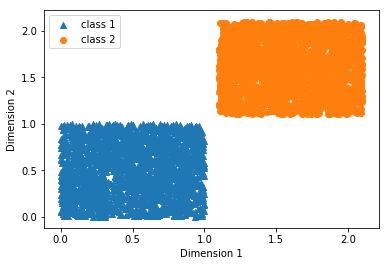

In [3]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [6]:
def ShuffletrainTestSplit(data, label, trainPercentage, testPercantage):
    X, y = shuffle(data, label)

#     print("X: ", len(X), "y: ", len(y))

    trainX = X[:int(trainPercentage * len(X))] # training data point
    trainY = y[:int(trainPercentage * len(y))] # training lables
    trainY = np.expand_dims(trainY, axis = 1)
    trainX = np.hstack((trainX, np.atleast_2d(np.ones(len(trainX))).T))


    validX = X[int(trainPercentage * len(X)) :  int(trainPercentage * len(X)) + int(testPercantage * len(X)) ] # validation data point
    validY = y[int(trainPercentage * len(y))  :  int(trainPercentage * len(y)) + int(testPercantage * len(y)) ]# validation lables
    validY = np.expand_dims(validY, axis = 1)
    validX = np.hstack((validX, np.atleast_2d(np.ones(len(validX))).T))
    
    testX = X[int(trainPercentage * len(X)) +  int(testPercantage * len(X))  :]# testing data point
    testY = y[int(trainPercentage * len(y)) +  int(testPercantage * len(X))  :]# testing lables
    testY = np.expand_dims(testY, axis = 1)
    testX = np.hstack((testX, np.atleast_2d(np.ones(len(testX))).T))
    print("tr: ", len(trainX) ,"v: ",  len(validX), "ts: ",  len(testX))
    print('Done')
    return trainX, trainY, testX, testY,validX,validY


In [7]:
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)
trainX, trainY, testX, testY,validX,validY= ShuffletrainTestSplit(data, label, 0.70, 0.15)

tr:  2800 v:  600 ts:  600
Done


D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


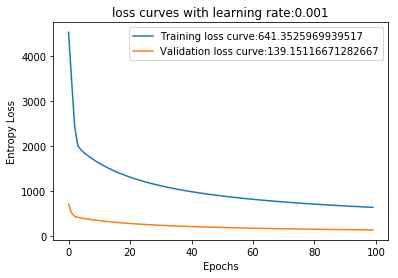

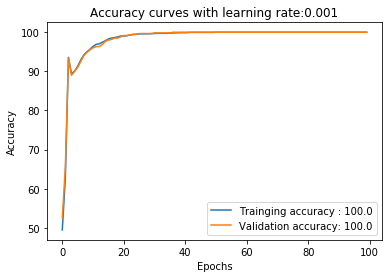

In [8]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 100, learningRate = 0.001, validationX = validX, validationY = validY)

In [9]:
model.accuracy(testX,testY)

100.0

In [12]:
#save the best model which you have trained, 
model.saveModel('msds19027_task1_saved.npy')

saving model
model saved..


#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [13]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('msds19027_task1_saved.npy')
# check accuracy of that model
mm.accuracy(testX,testY)




[[-1.82685527]
 [-1.83426261]
 [ 3.66387129]]


100.0